In [7]:
from sklearn.datasets import load_iris
iris = load_iris()  # It is a bunch object, similar to dictionary
print(type(iris))
print(iris.keys())  # To check keys
print(iris['DESCR'])  # To check complete description

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (

In [12]:
print(iris['data'].shape)  # To know the shape of the Dataset
# It means - we have 150 flowers to check that they fall into which categories or target_names i.e. Setosa, Versicolor,
# Virginica
print(iris['target'].shape)  # To know the shape of the target variable

(150, 4)
(150,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                    random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train)  # to check that it is random

(112, 4)
(38, 4)


array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

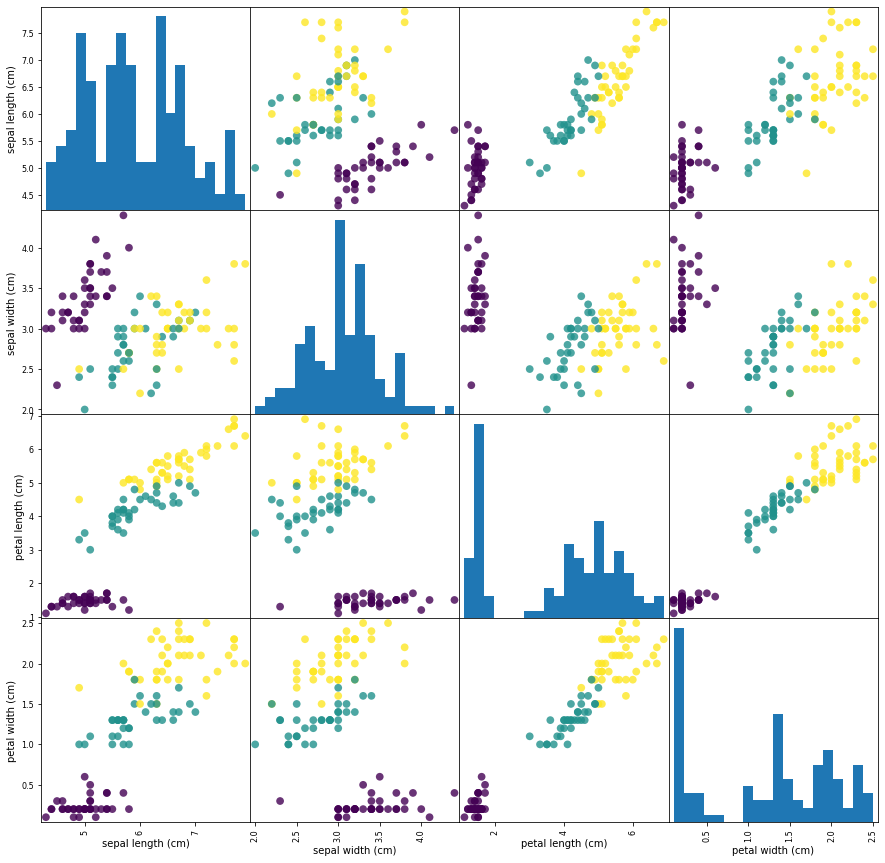

In [42]:
# Pair Plots: Approach1
import pandas as pd
# create dataframe
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
# create scatter matrix from dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15), marker='o',
                         hist_kwds = {'bins':20}, s=60, alpha=0.8);


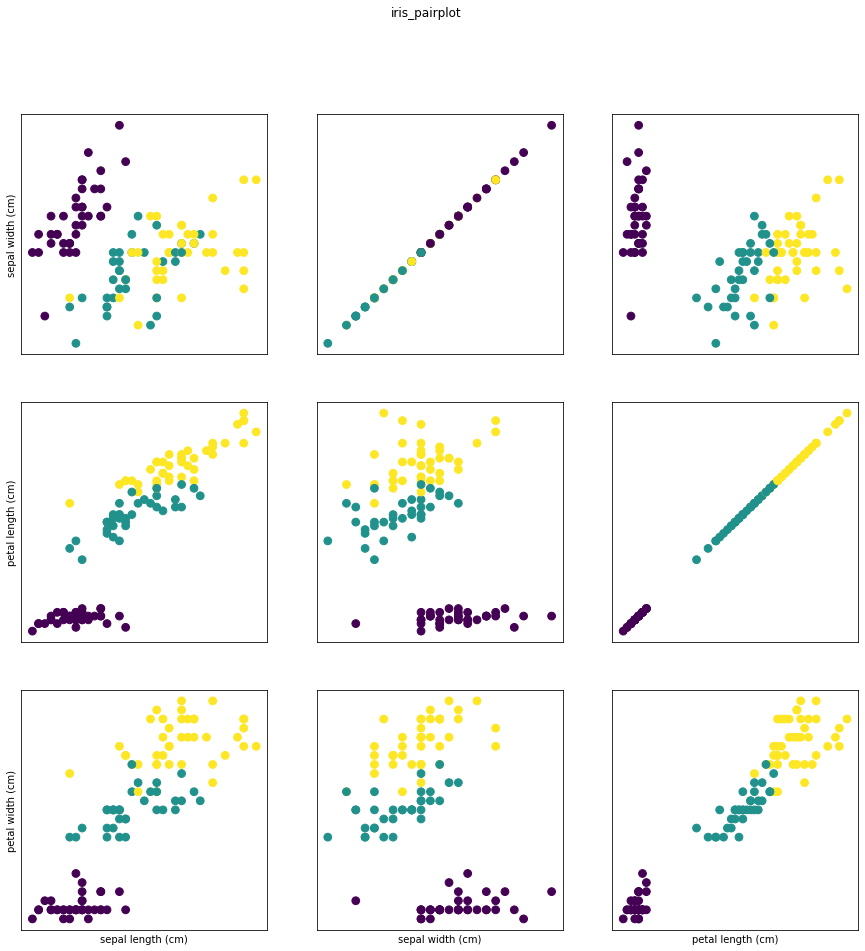

In [24]:
#  Pair plots: approach2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
plt.suptitle('iris_pairplot')

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:,j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

In [28]:
# Instantiating KNeighboursClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  # The knn object encapsulates the algorithm to build the model from the training data,
# as well the algorithm to make predictions on new data points.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
# Dummy flower parameter for prediction
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print(X_new.shape)
# Making prediction
prediction = knn.predict(X_new)
print(prediction)


(1, 4)
[0]


In [45]:
# Model evaluation
y_pred = knn.predict(X_test)  # To check the prediction for our test data
print(y_pred == y_test)  # To check how many of them are matching
print(np.mean(y_pred == y_test))  # Accuracy in terms of percentage i.e. no. of Trues/Sample
# Score method of kNN that also gives the accuracy
print(knn.score(X_test, y_test))


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
0.9736842105263158
0.9736842105263158
